In [28]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    drive_mounted = True
except ModuleNotFoundError:
    drive_mounted = False

In [29]:
import pandas as pd

pd.options.display.max_columns = 200
pd.options.display.max_rows = 85

DRIVE_PATH = 'drive/MyDrive' if drive_mounted else ''
DATA_PATH = DRIVE_PATH + '~/Projects/hse/course-work/data'

showcase = pd.read_csv(f'{DATA_PATH}/showcase_all.csv', index_col=[0])
showcase.head()

,КоличествоЧеков,КоличествоЧековВсе,СреднийЧек,СреднееЧислоТоваровЧека,СреднееЧислоТоваровЧекаВсе,Выручка,ВыручкаВся,КоличествоТоваров,КоличествоТоваровВсе,СредняяМаржа,СредняяМаржаВся,ДоляВыкупленных,ПроцентОтмен,ДатаПоследнегоЗаказаВЫК,ДатаПоследнегоЗаказа,ИГРУШКИ,ППКП,ОДЕЖДА,КГТ,ИНОЕ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ИГРУШКИ.1,ДЕТСКОЕ ПИТАНИЕ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,ОБУВЬ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,СОПУТСТВУЮЩИЕ ТОВАРЫ,ЖЕНСКИЕ ШТУЧКИ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ | КАНЦТОВАРЫ",ИГРУШКИ | ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ДЕТСКОЕ ПИТАНИЕ | ЗАМЕНИТЕЛИ МОЛОКА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | АКСЕССУАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ДЕТСКОЕ БЕЛЬЁ",КРУПНОГАБАРИТНЫЙ ТОВАР | КОЛЯСКИ,"ИГРУШКИ | ФИГУРЫ, ПЕРСОНАЖИ",ПОДГУЗНИКИ | ПОДГУЗНИКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА",ИГРУШКИ | АКТИВНЫЙ ОТДЫХ,КОСМЕТИКА/ГИГИЕНА | ДЕТСКАЯ КОСМЕТИКА,КОСМЕТИКА/ГИГИЕНА | ПРЕДМЕТЫ ПО УХОДУ ЗА НОВОРОЖДЕННЫМИ,КРУПНОГАБАРИТНЫЙ ТОВАР | АВТОКРЕСЛА,КРУПНОГАБАРИТНЫЙ ТОВАР | КОЛЯСКИ ДЛЯ КУКОЛ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | БУТЫЛОЧКИ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | СОСКИ/ПУСТЫШКИ,ДЕТСКОЕ ПИТАНИЕ | БАКАЛЕЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)",КОСМЕТИКА/ГИГИЕНА | СРЕДСТВА ГИГИЕНЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ПОСТЕЛЬНОЕ БЕЛЬЕ",ПОДГУЗНИКИ | ПЕЛЕНКИ ОДНОРАЗОВЫЕ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",КОСМЕТИКА/ГИГИЕНА | ТОВАРЫ ДЛЯ МАМ,ОБУВЬ | ОБУВЬ ДЕТСКАЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ДЕТСКАЯ ОДЕЖДА (2-6 лет)",ИГРУШКИ | НАСТОЛЬНЫЕ ИГРЫ,ДЕТСКОЕ ПИТАНИЕ | КАШИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ | ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ",ИГРУШКИ | МЯГКИЕ ИГРУШКИ,ИГРУШКИ | ТВОРЧЕСТВО,ДЕТСКОЕ ПИТАНИЕ | ПЮРЕ,ДЕТСКОЕ ПИТАНИЕ | НАПИТКИ,КРУПНОГАБАРИТНЫЙ ТОВАР | ВЕЛОСИПЕДЫ/САМОКАТЫ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | ЭЛЕКТРОПРИБОРЫ,ИГРУШКИ | ИГРУШКИ ДЛЯ ДЕВОЧЕК,ИГРУШКИ | ИГРУШКИ ДЛЯ МАЛЬЧИКОВ,"ТЕКСТИЛЬ, ТРИКОТАЖ | ДЕТСКИЕ КОЛГОТКИ И НОСКИ",ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ТОВАРЫ ДЛЯ КОШЕК,ИГРУШКИ | КОНСТРУКТОРЫ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | ПОСУДА,ОБУВЬ | СОПУТСТВУЮЩИЕ ТОВАРЫ ДЛЯ ОБУВИ,КРУПНОГАБАРИТНЫЙ ТОВАР | ИЗДЕЛИЯ ИЗ ПЛАСТМАССЫ,КОСМЕТИКА/ГИГИЕНА | СРЕДСТВА БЫТОВОЙ ХИМИИ,ПОДГУЗНИКИ | ТРУСИКИ НЕПРОМОКАЕМЫЕ,КРУПНОГАБАРИТНЫЙ ТОВАР | КАТАЛКИ/КАЧАЛКИ,"СОПУТСТВУЮЩИЕ ТОВАРЫ | КОПИЛКИ, БРЕЛОКИ, МАГНИТИКИ","ТЕКСТИЛЬ, ТРИКОТАЖ | ДЕТСКАЯ ОДЕЖДА (7-16 лет)",КРУПНОГАБАРИТНЫЙ ТОВАР | СПОРТИВНЫЕ КОМПЛЕКСЫ И ПЕСОЧНИЦЫ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | МОЛОКООТСОСЫ,КРУПНОГАБАРИТНЫЙ ТОВАР | ДЕТСКИЕ СТУЛЬЯ ДЛЯ КОРМЛЕНИЯ,"КРУПНОГАБАРИТНЫЙ ТОВАР | ДЕТСКАЯ МЕБЕЛЬ, МАТРАСЫ",ИГРУШКИ | МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ,ДЕТСКОЕ ПИТАНИЕ | КОНДИТЕРСКИЕ ИЗДЕЛИЯ,КРУПНОГАБАРИТНЫЙ ТОВАР | ХОДУНКИ/ПРЫГУНКИ,ЖЕНСКИЕ ШТУЧКИ | КОСМЕТИКА/ГИГИЕНА ДЛЯ МАМ,ДЕТСКОЕ ПИТАНИЕ | ПРОДУКТЫ ПИТАНИЯ ДЛЯ МАМ,КРУПНОГАБАРИТНЫЙ ТОВАР | МАНЕЖИ/ШЕЗЛОНГИ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ТОВАРЫ ДЛЯ СОБАК,СОПУТСТВУЮЩИЕ ТОВАРЫ | ЭЛЕМЕНТЫ ПИТАНИЯ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА | ДЕКОР,"ТЕКСТИЛЬ, ТРИКОТАЖ | АКСЕССУАРЫ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА | СИСТЕМЫ ХРАНЕНИЯ,СОПУТСТВУЮЩИЕ ТОВАРЫ | СУМКИ,ЖЕНСКИЕ ШТУЧКИ | АКСЕССУАРЫ ДЛЯ ВОЛОС,ИГРУШКИ | ВСЁ ДЛЯ ПРАЗДНИКА,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ | ФОТОАЛЬБОМЫ/ФОТОРАМКИ",СОПУТСТВУЮЩИЕ ТОВАРЫ | АКСЕССУАРЫ ДЛЯ ДЕВОЧЕК,КРУПНОГАБАРИТНЫЙ ТОВАР | САНКИ/СНЕГОКАТЫ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ТОВАРЫ ДЛЯ ГРЫЗУНОВ,"КРУПНОГАБАРИТНЫЙ ТОВАР | КОРЗИНЫ, ЯЩИКИ ДЛЯ ИГРУШЕК",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ | СУМКИ ДЛЯ МАМ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ТОВАРЫ ДЛЯ ПТИЦ,"ЖЕНСКИЕ ШТУЧКИ | АКСЕССУАРЫ МАКИЯЖ, МАНИКЮР",ЖЕНСКИЕ ШТУЧКИ | СПОРТ.ИНВЕНТАРЬ,ДЕТСКОЕ ПИТАНИЕ | КИСЛОМОЛОЧНЫЕ ПРОДУКТЫ,"ЖЕНСКИЕ ШТУЧКИ | ОДЕЖДА, ОБУВЬ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА | ПОСУДА,КРУПНОГАБАРИТНЫЙ ТОВАР | ЭЛЕКТРОМОБИЛИ/МАШИНЫ ПЕДАЛЬНЫЕ,СОПУТСТВУЮЩИЕ ТОВАРЫ | ЛАМПЫ/СВЕТИЛЬНИКИ,ДЕТСКОЕ ПИТАНИЕ | ВИТАМИНЫ/БАДЫ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | БЫТОВАЯ ХИМИЯ ДЛЯ ЖИВОТНЫХ,ЖЕНСКИЕ ШТУЧКИ | ГАЛАНТЕРЕЯ,ЖЕНСКИЕ ШТУЧКИ | ХОЗЯЙСТВЕННЫЕ ТОВАРЫ,СОПУТСТВУЮЩИЕ ТОВАРЫ | ЧАСЫ/ОЧКИ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА | ТЕХНИКА ДЛЯ КУХНИ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ВЕТАПТЕКА,ОБУВЬ | ОБУВЬ ЖЕНСКАЯ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ | ТОВАРЫ ДЛЯ РЫБ,"ЖЕНСКИЕ ШТУЧКИ | ШАПКИ, ШАРФЫ","КАНЦТОВАРЫ, КНИГИ, ДИСКИ | МЕДИАПРОДУКЦИЯ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА |

In [30]:
showcase.shape

(200338, 150)

In [31]:
client_data = showcase[showcase['КоличествоЧеков'] > 0]

client_data.drop(columns=['КоличествоЧековВсе', 'СреднееЧислоТоваровЧекаВсе', 'ВыручкаВся',
                          'КоличествоТоваровВсе', 'СредняяМаржаВся', 'ПроцентОтмен',
                          'ДоляВыкупленных', 'ДатаПоследнегоЗаказа'], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
INDICATORS = ['КоличествоЧеков', 'СреднийЧек', 'СреднееЧислоТоваровЧека',
              'Выручка', 'КоличествоТоваров', 'СредняяМаржа']

REGIONS = ['NORTH', 'SOUTHERN', 'CENTRAL',
           'PRIVOLZIE', 'SIBERIA', 'FAR EAST', 'URAL']

DATES = ['ДатаПоследнегоЗаказаВЫК']
PAYMENT = ['Безналичная', 'Наличная']
DAY_TYPE = ['Будни', 'Выходные']
DAY_TIME = ['Ночь', 'День', 'Утро', 'Вечер']
SHIPPING = ['Самовывоз', 'Курьер']

LVL1 = ['ИГРУШКИ', 'ППКП', 'ОДЕЖДА', 'КГТ', 'ИНОЕ']

LVL2 = ['КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ИГРУШКИ',
        'ДЕТСКОЕ ПИТАНИЕ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ',
        'ТЕКСТИЛЬ, ТРИКОТАЖ', 'КРУПНОГАБАРИТНЫЙ ТОВАР',
        'ПОДГУЗНИКИ', 'КОСМЕТИКА/ГИГИЕНА', 'ОБУВЬ', 
        'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
        'ЖЕНСКИЕ ШТУЧКИ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА']

LVL3 = list(set(client_data.columns) -
            set(INDICATORS + REGIONS + PAYMENT + SHIPPING +
                DAY_TYPE + DAY_TIME + LVL1 + LVL2 + DATES))

LVL3.remove('ИГРУШКИ.1') ### FIX

In [33]:
cut_off = lambda col: client_data[col].quantile(0.99)

client_data = client_data.loc[(
    (client_data['КоличествоЧеков'] < cut_off('КоличествоЧеков')) &
    (client_data['СреднийЧек'] < cut_off('СреднийЧек')) &
    (client_data['СреднееЧислоТоваровЧека'] < cut_off('СреднееЧислоТоваровЧека')) &
    (client_data['Выручка'] < cut_off('Выручка')) &
    (client_data['КоличествоТоваров'] < cut_off('КоличествоТоваров')) &
    (client_data['СредняяМаржа'] < cut_off('СредняяМаржа'))), :]

In [34]:
client_data['ID'] = client_data.index

client_data_preprocessed = client_data.loc[:, ['ID', 'ДатаПоследнегоЗаказаВЫК', 'КоличествоЧеков', 'Выручка']]
client_data_preprocessed = client_data_preprocessed.rename(
    columns={'ДатаПоследнегоЗаказаВЫК': 'Recency',
             'КоличествоЧеков': 'Frequency',
             'Выручка': 'Monetary'}
)

client_data_preprocessed = client_data_preprocessed.astype(
    {'Recency': 'int64',
     'Frequency': 'int64',
     'Monetary': 'float64'}
)
client_data_preprocessed.head()

,ID,Recency,Frequency,Monetary
51534957-48525550515032,51534957-48525550515032,113,1,997.0
55525753-54505353554970,55525753-54505353554970,14,1,493.0
55525757-49565652494875,55525757-49565652494875,85,1,313.0
55545455-55555653564971,55545455-55555653564971,68,1,17000.0
55555748-48484848484870,55555748-48484848484870,36,1,959.0


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def build_displots_without_nan(data, columns, n_col=1, name='displots'):
    if len(columns) == 1:
        fig, ax = plt.subplots(1, 1, figsize=(20, 16))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        cur_data = data[~data[columns[0]].isna()][columns[0]]
        try:
            try:
                sns_plot = sns.distplot(cur_data, ax=ax, color='blue')
            except:
                sns_plot = sns.distplot(cur_data, ax=ax, color='red', kde_kws={'bw': 0.1})
        except:
            sns_plot = cur_data.hist(ax=axes[0], color='green')
        ax.set_title(columns[0])
        plt.show()
    elif n_col >= len(columns):
        fig, axes = plt.subplots(1, n_col, figsize=(20, 16 // n_col))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[idx], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[idx], color='green')
            axes[idx].set_title(columns[idx])
        plt.show()
    else:
        m = n_col
        n = (len(columns) + m - 1) // m
        fig, axes = plt.subplots(n, m, figsize=(20, n * (16 // m)))
        fig.suptitle(name)
        fig.tight_layout(pad=3.0)
        for idx in range(len(columns)):
            cur_data = data[~data[columns[idx]].isna()][columns[idx]]
            i, j = idx // m, idx % m
            try:
                try:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], color='blue')
                except:
                    sns_plot = sns.distplot(cur_data, ax=axes[i, j], kde_kws={'bw': 0.1}, color='red')
            except:
                sns_plot = cur_data.hist(ax=axes[i, j], color='green')
            axes[i, j].set_title(columns[idx])
        plt.show()
    return

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

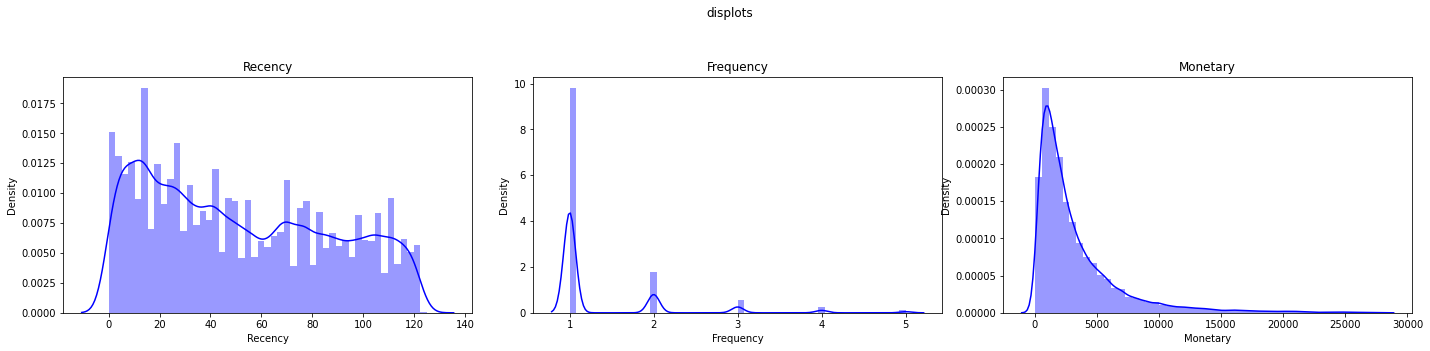

In [36]:
build_displots_without_nan(
    client_data_preprocessed,
    ['Recency', 'Frequency', 'Monetary'],
    n_col=3
)

In [37]:
rfm_table = client_data_preprocessed.copy()
rfm_table.head()

,ID,Recency,Frequency,Monetary
51534957-48525550515032,51534957-48525550515032,113,1,997.0
55525753-54505353554970,55525753-54505353554970,14,1,493.0
55525757-49565652494875,55525757-49565652494875,85,1,313.0
55545455-55555653564971,55545455-55555653564971,68,1,17000.0
55555748-48484848484870,55555748-48484848484870,36,1,959.0


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [39]:
def find_n_clusters(data, col):
    range_n_clusters = np.arange(1, 10)
    wcs = []

    for k in range_n_clusters:
        clusterer = KMeans(n_clusters=k, random_state=42).fit(data[col])
        wcs.append(clusterer.inertia_)

    plt.figure(figsize=(12, 6))
    plt.plot(range_n_clusters, wcs, linewidth=3, label='WCS')
    plt.scatter(range_n_clusters, wcs, linewidth=3)
    plt.xlabel('The number of clusters', size=16)
    plt.ylabel('Within-Cluster-Sum of Squared Errors', size=16)
    plt.legend(loc='best', fontsize=16)
    plt.title(f'Elbow method for {col[0]}', loc='center', size=16)
    plt.grid(b=1)
    plt.show()

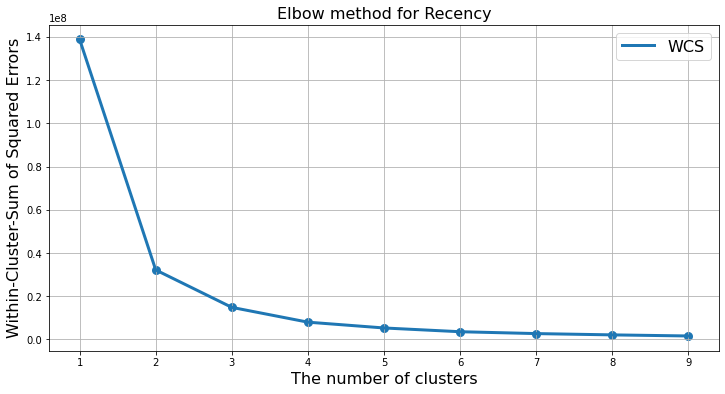

In [40]:
find_n_clusters(rfm_table, ['Recency'])

<ipython-input-39-072c2feb852a>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  clusterer = KMeans(n_clusters=k, random_state=42).fit(data[col])
<ipython-input-39-072c2feb852a>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  clusterer = KMeans(n_clusters=k, random_state=42).fit(data[col])
<ipython-input-39-072c2feb852a>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  clusterer = KMeans(n_clusters=k, random_state=42).fit(data[col])
<ipython-input-39-072c2feb852a>:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  clusterer = KMeans(n_clusters=k, random_state=42).fit(data[col])


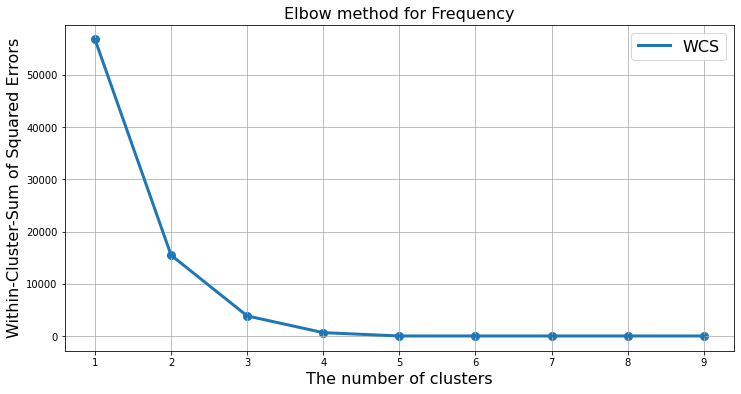

In [41]:
find_n_clusters(rfm_table, ['Frequency'])

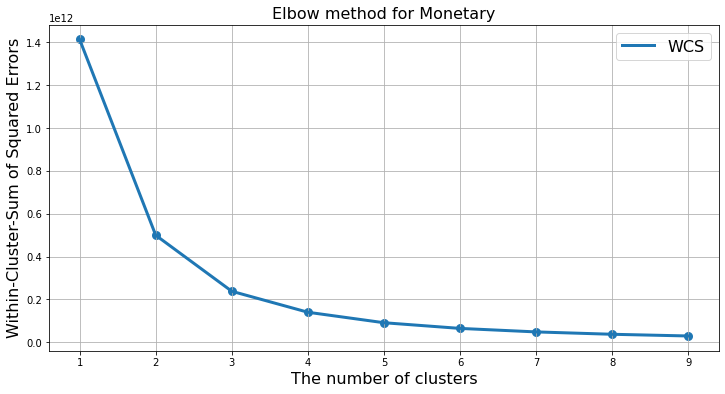

In [42]:
find_n_clusters(rfm_table, ['Monetary'])

In [43]:
def sort_clusters(cluster_col, target_col, data, ascending=True):
    tmp = data.groupby(cluster_col)[target_col].mean().reset_index()
    tmp = tmp.sort_values(by=target_col, ascending=ascending).reset_index(drop=True)
    tmp['index'] = tmp.index
    
    data_sorted = pd.merge(data, tmp[[cluster_col, 'index']], on=cluster_col)
    data_sorted = data_sorted.drop([cluster_col], axis=1)
    data_sorted = data_sorted.rename(columns={'index': cluster_col})
    
    return data_sorted

In [44]:
opt_n_clusters = {'Recency': 5, 'Frequency': 5, 'Monetary': 5}
sort_order = [False, True, True]

for i, (col, n_clusters) in enumerate(opt_n_clusters.items()):
    clusterer = KMeans(n_clusters=n_clusters)
    rfm_table.loc[:, col + 'Cluster'] = clusterer.fit_predict(rfm_table[[col]])
    rfm_table = sort_clusters(col + 'Cluster', col, rfm_table, ascending=sort_order[i])

rfm_table

,ID,Recency,Frequency,Monetary,RecencyCluster,FrequencyCluster,MonetaryCluster
0,51534957-48525550515032,113,1,997.0,0,0,0
1,55574848-48535749545379,96,1,1096.0,0,0,0
2,55574848-48545757535071,107,1,1365.0,0,0,0
3,55574848-48555248575778,110,1,1579.0,0,0,0
4,55574848-48555254495573,111,1,1685.0,0,0,0
...,...,...,...,...,...,...,...
107979,55575555-50545255485376,35,5,26188.0,3,4,4
107980,55575555-56495249524973,24,5,22396.0,3,4,4
107981,55575655-51574954575278,22,5,16127.0,3,4,4
107982,55575655-57524851494974,38,5,17813.0,3,4,4


In [45]:
rec_cluster_info = rfm_table.groupby('RecencyCluster')['Recency'].agg(
    ['min','max','mean', 'count']).reset_index()
rec_cluster_info

,RecencyCluster,min,max,mean,count
0,0,95,125,108.065976,18522
1,1,69,94,80.644804,19119
2,2,44,68,55.639190,18561
3,3,21,43,31.597824,24171
4,4,0,20,9.762667,27611


In [46]:
freq_cluster_info = rfm_table.groupby('FrequencyCluster')['Frequency'].agg(
    ['min','max','mean', 'count']).reset_index()
freq_cluster_info

,FrequencyCluster,min,max,mean,count
0,0,1,1,1,84704
1,1,2,2,2,15426
2,2,3,3,3,4905
3,3,4,4,4,2012
4,4,5,5,5,937


In [47]:
mon_cluster_info = rfm_table.groupby('MonetaryCluster')['Monetary'].agg(
    ['min','max','mean', 'count']).reset_index()
mon_cluster_info

,MonetaryCluster,min,max,mean,count
0,0,10.0,2238.0,1146.581894,56736
1,1,2239.0,4843.0,3310.242477,28899
2,2,4844.0,8783.0,6357.673213,14368
3,3,8785.0,15309.0,11222.564518,5837
4,4,15316.0,27825.0,19448.593848,2144


In [48]:
def segmenter(client):
    r = client['RecencyCluster']
    f = client['FrequencyCluster']
    m = client['MonetaryCluster']
    
    if r == 4:
        if f == 0:
            if m <= 1:
                return 'Новички'
            else:
                return 'Перспективные'
        elif f < 2:
            if m <= 1:
                return 'Перспективные'
            else:
                return 'Лояльные'
        else:
            return 'Лояльные'
    
    if r == 3:
        if f == 0:
            if m < 1:
                return 'Перспективные'
            else:
                return 'Лояльные'
        else:
            return 'Лояльные'
        
    if r == 2:
        if f == 0:
            if m < 1:
                return 'Дрейфующие'
            else:
                return 'Спящие'
        else:
            return 'В зоне риска'
    
    if r == 1:
        if f == 0:
            if m < 2:
                return 'Спящие'
            else:
                return 'В зоне риска'
        else:
            return 'В зоне риска'
    
    if r == 0:
        if f == 0:
            if m < 2:
                return 'Спящие'
            else:
                return 'В зоне риска'
        else:
            return 'В зоне потери'

    return client['RFM']

rfm_table['RFM'] = (rfm_table['RecencyCluster'].map(str) +
                    rfm_table['FrequencyCluster'].map(str) +
                    rfm_table['MonetaryCluster'].map(str))
rfm_table['Segment'] = rfm_table.apply(segmenter, axis=1)

In [49]:
client_data_final = rfm_table.copy()
client_data_final.index = client_data_final['ID']
client_data_final.drop(columns=['ID'], inplace=True)
client_data_orig = showcase.copy()

client_data_orig['Сегмент'] = -1
client_data_orig.loc[client_data_final.index, 'Сегмент'] = client_data_final.loc[:, 'Segment']
client_data_orig.loc[client_data_orig['КоличествоЧеков'] == 0, 'Сегмент'] = 0
client_data_orig = client_data_orig.loc[client_data_orig['Сегмент'] != -1, :]

client_data_orig.to_csv(f'{DATA_PATH}/rfm_clustered.csv')

### Анализ сегментов

In [50]:
segments_info = rfm_table.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

segments_info.columns = segments_info.columns.droplevel()
segments_info.columns = ['Recency среднее', 'Frequency среднее', 'Monetary среднее', 'Количество']
segments_info['Доли, %'] = round(segments_info['Количество'] / segments_info['Количество'].sum() * 100, 2) 

segments_info.sort_values('Доли, %', ascending=False)

,Recency среднее,Frequency среднее,Monetary среднее,Количество,"Доли, %"
Segment,,,,,
Спящие,88.6,1.0,2263.2,35058,32.47
Лояльные,24.8,2.2,6469.2,18613,17.24
Перспективные,23.9,1.2,2551.2,17281,16.00
Новички,10.0,1.0,1713.9,15888,14.71
В зоне риска,77.0,1.8,6674.7,10808,10.01
Дрейфующие,56.0,1.0,1107.8,9105,8.43
В зоне потери,104.7,2.1,4846.7,1231,1.14


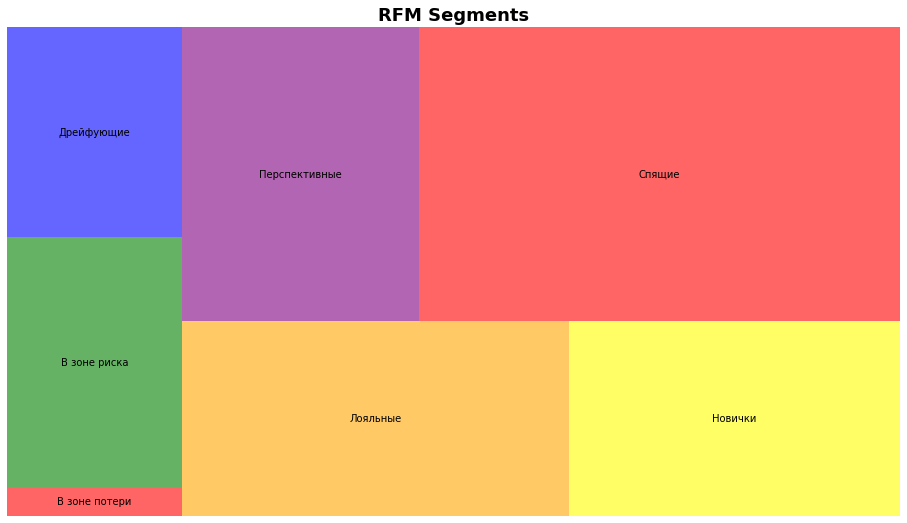

In [51]:
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
colors = ['red','green', 'blue', 'orange', 'yellow', 'purple']
squarify.plot(sizes=segments_info['Количество'], 
              label=list(segments_info.index), alpha=.6, color=colors)

plt.title('RFM Segments', fontsize=18, fontweight='bold')
plt.axis('off')
plt.show()

In [52]:
final_table = rfm_table['ID'].apply(lambda client: client_data.loc[client, :])

final_table['Сегмент'] = rfm_table.loc[:, 'Segment']
final_table['ID'] = rfm_table.loc[:, 'ID']
final_table.set_index('ID', inplace=True)

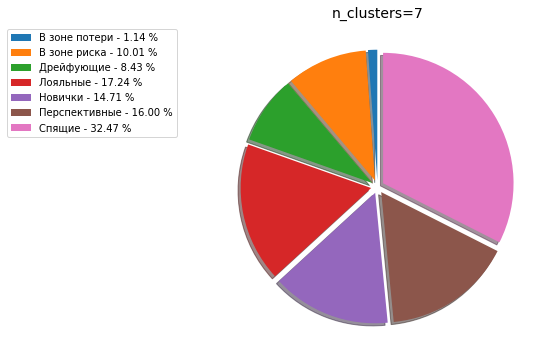

In [53]:
unique = segments_info.index.to_list()
n_clusters = len(unique)

counts = segments_info['Количество']
percents = segments_info['Доли, %']

legend = ['{0} - {1:1.2f} %'.format(l, p) for l, p in zip(unique, percents)]

plt.figure(figsize=(12, 6))
plt.pie(counts, explode=[0.05] * n_clusters, shadow=True, startangle=90)
plt.title(f'n_clusters={n_clusters}', fontsize=14)
plt.legend(legend, loc='best',
              bbox_to_anchor=(-0.1, 1.), fontsize=10)

plt.show()

In [54]:
lvl2_cluster_info = final_table.groupby('Сегмент').agg({
    cat2 : 'mean' for cat2 in LVL2
}).round(4)

lvl2_cluster_info

,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ИГРУШКИ,ДЕТСКОЕ ПИТАНИЕ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,ОБУВЬ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,СОПУТСТВУЮЩИЕ ТОВАРЫ,ЖЕНСКИЕ ШТУЧКИ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА
Сегмент,,,,,,,,,,,,,
В зоне потери,0.0240,0.2297,0.0875,0.0559,0.2333,0.0843,0.0997,0.0638,0.1057,0.0088,0.0017,0.0045,0.0010
В зоне риска,0.0325,0.1630,0.0933,0.0568,0.1745,0.2193,0.1445,0.0584,0.0446,0.0104,0.0007,0.0010,0.0010
Дрейфующие,0.0540,0.3238,0.0467,0.0823,0.1516,0.0713,0.1071,0.0838,0.0609,0.0145,0.0014,0.0006,0.0020
Лояльные,0.0268,0.1986,0.1003,0.0474,0.1869,0.1352,0.1765,0.0625,0.0456,0.0174,0.0011,0.0007,0.0010
Новички,0.0367,0.4053,0.0424,0.0482,0.1684,0.0784,0.0889,0.0596,0.0512,0.0165,0.0022,0.0005,0.0017
Перспективные,0.0375,0.3426,0.0512,0.0577,0.1743,0.1022,0.1001,0.0569,0.0601,0.0137,0.0016,0.0005,0.0016
Спящие,0.0427,0.2830,0.0508,0.0573,0.1826,0.1268,0.1082,0.0565,0.0770,0.0110,0.0015,0.0012,0.0014


In [58]:
lvl2_prefs = pd.DataFrame(index=lvl2_cluster_info.index, columns=[str(i + 1) + ' приоритет' for i in range(10)])

for seg in lvl2_cluster_info.index:
    prefs = lvl2_cluster_info.loc[seg, :].tolist().copy()
    sorted_prefs = np.array(LVL2)[np.argsort(prefs)[::-1]]
    lvl2_prefs.loc[seg, :] = sorted_prefs[:lvl2_prefs.shape[1]]

lvl2_prefs

,1 приоритет,2 приоритет,3 приоритет,4 приоритет,5 приоритет,6 приоритет,7 приоритет,8 приоритет,9 приоритет,10 приоритет
Сегмент,,,,,,,,,,
В зоне потери,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,ОБУВЬ,ПОДГУЗНИКИ,ДЕТСКОЕ ПИТАНИЕ,КРУПНОГАБАРИТНЫЙ ТОВАР,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ ЖИВОТНЫХ
В зоне риска,КРУПНОГАБАРИТНЫЙ ТОВАР,"ТЕКСТИЛЬ, ТРИКОТАЖ",ИГРУШКИ,ПОДГУЗНИКИ,ДЕТСКОЕ ПИТАНИЕ,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ОБУВЬ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ ЖИВОТНЫХ
Дрейфующие,ИГРУШКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ПОДГУЗНИКИ,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ДЕТСКОЕ ПИТАНИЕ,ТОВАРЫ ДЛЯ ЖИВОТНЫХ
Лояльные,ИГРУШКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ПОДГУЗНИКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,ДЕТСКОЕ ПИТАНИЕ,КОСМЕТИКА/ГИГИЕНА,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ОБУВЬ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ ЖИВОТНЫХ
Новички,ИГРУШКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ПОДГУЗНИКИ,КРУПНОГАБАРИТНЫЙ ТОВАР,КОСМЕТИКА/ГИГИЕНА,ОБУВЬ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,ДЕТСКОЕ ПИТАНИЕ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ ЖИВОТНЫХ
Перспективные,ИГРУШКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,ОБУВЬ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КОСМЕТИКА/ГИГИЕНА,ДЕТСКОЕ ПИТАНИЕ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ ЖИВОТНЫХ
Спящие,ИГРУШКИ,"ТЕКСТИЛЬ, ТРИКОТАЖ",КРУПНОГАБАРИТНЫЙ ТОВАР,ПОДГУЗНИКИ,ОБУВЬ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,КОСМЕТИКА/ГИГИЕНА,ДЕТСКОЕ ПИТАНИЕ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ТОВАРЫ ДЛЯ ЖИВОТНЫХ


In [55]:
basket = {
    cat2 : [cat3 for cat3 in LVL3 if cat3.startswith(cat2)] for cat2 in LVL2
}

def f(x):
    d = []
    index1 = []
    index2 = []
    
    for i, (cat2, sublist) in enumerate(basket.items()):
        index1 += [cat2] * len(sublist)
        for cat3 in sublist:
            d.append(x[cat3].mean())
            index2.append(cat3.split(' | ')[1])
    
    return pd.Series(d, index=[index1, index2])

lvl3_cluster_info = final_table.groupby('Сегмент').apply(f).round(4)
lvl3_cluster_info

КАНЦТОВАРЫ, КНИГИ, ДИСКИ                                       \
                            КАНЦТОВАРЫ ФОТОАЛЬБОМЫ/ФОТОРАМКИ МЕДИАПРОДУКЦИЯ   
Сегмент                                                                       
В зоне потери                   0.0150                0.0000         0.0000   
В зоне риска                    0.0227                0.0004         0.0000   
Дрейфующие                      0.0320                0.0013         0.0002   
Лояльные                        0.0149                0.0005         0.0002   
Новички                         0.0189                0.0012         0.0003   
Перспективные                   0.0197                0.0011         0.0001   
Спящие                          0.0317                0.0008         0.0001   

                                                        ИГРУШКИ  \
              ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ МУЗЫКАЛЬНЫЕ ИНСТРУМЕНТЫ   
Сегмент                                                           
В зоне потери                    0.0090                  0.0034   
В зоне риска                     0.0094                  0.0019   
Дрейфующие                       0.0204                  0.0036   
Лояльные                         0.0112                  0.0027   
Новички                          0.0163                  0.0046   
Перспективные                    0.0166                  0.0038   
Спящие                           0.0101                  0.0036   

                                                                         \
              АКТИВНЫЙ ОТДЫХ ИГРУШКИ ДЛЯ МАЛЬЧИКОВ ЗАПЧАСТИ ДЛЯ ИГРУШЕК   
Сегмент                                                                   
В зоне потери         0.0107                0.0267                  0.0   
В зоне риска          0.0059                0.0194                  0.0   
Дрейфующие            0.0134                0.0518                  0.0   
Лояльные              0.0048                0.0277                  0.0   
Новички               0.0086                0.0581                  0.0   
Перспективные         0.0076                0.0461                  0.0   
Спящие                0.0156                0.0398                  0.0   

                                                                        \
              КОНСТРУКТОРЫ ТВОРЧЕСТВО МЯГКИЕ ИГРУШКИ ВСЁ ДЛЯ ПРАЗДНИКА   
Сегмент                                                                  
В зоне потери       0.0196     0.0099         0.0051            0.0064   
В зоне риска        0.0181     0.0062         0.0042            0.0031   
Дрейфующие          0.0368     0.0231         0.0133            0.0055   
Лояльные            0.0266     0.0111         0.0049            0.0025   
Новички             0.1017     0.0226         0.0153            0.0049   
Перспективные       0.0479     0.0260         0.0142            0.0043   
Спящие              0.0348     0.0136         0.0112            0.0030   

                                                              \
              ФИГУРЫ, ПЕРСОНАЖИ ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ   
Сегмент                                                        
В зоне потери            0.0079                       0.0695   
В зоне риска             0.0036                       0.0560   
Дрейфующие               0.0103                       0.0758   
Лояльные                 0.0068                       0.0603   
Новички                  0.0122                       0.0852   
Перспективные            0.0113                       0.0835   
Спящие                   0.0086                       0.0810   

                                                           ДЕТСКОЕ ПИТАНИЕ  \
              ИГРУШКИ ДЛЯ ДЕВОЧЕК НАСТОЛЬНЫЕ ИГРЫ ПРОДУКТЫ ПИТАНИЯ ДЛЯ МАМ   
Сегмент                                                                      
В зоне потери              0.0631          0.0073                   0.0062   
В зоне риска               0.0364          0.0083                   0.0022   
Дрейфующие                 0.

In [56]:
regions_cluster_info = final_table.groupby('Сегмент').agg({
    reg : 'mean' for reg in REGIONS
}).round(4)

regions_cluster_info

,NORTH,SOUTHERN,CENTRAL,PRIVOLZIE,SIBERIA,FAR EAST,URAL
Сегмент,,,,,,,
В зоне потери,0.0795,0.0603,0.5672,0.1581,0.0715,0.0024,0.0611
В зоне риска,0.0944,0.0782,0.5204,0.1588,0.0719,0.0046,0.0718
Дрейфующие,0.1136,0.0559,0.5852,0.1397,0.0501,0.0023,0.0533
Лояльные,0.0939,0.0698,0.5561,0.1510,0.0611,0.0038,0.0643
Новички,0.1106,0.0577,0.5788,0.1363,0.0568,0.0026,0.0573
Перспективные,0.1063,0.0593,0.5724,0.1445,0.0583,0.0019,0.0573
Спящие,0.1105,0.0635,0.5371,0.1595,0.0649,0.0022,0.0623


In [57]:
kpi_cluster_info = final_table.groupby('Сегмент').agg({
    ind : 'mean' for ind in INDICATORS
}).round(2)

kpi_cluster_info

,КоличествоЧеков,СреднийЧек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,СредняяМаржа
Сегмент,,,,,,
В зоне потери,2.13,2301.71,3.62,4846.70,7.78,238.32
В зоне риска,1.82,4709.35,4.23,6674.68,7.73,582.05
Дрейфующие,1.00,1107.82,2.66,1107.82,2.66,170.31
Лояльные,2.16,3552.68,4.14,6469.24,9.19,443.82
Новички,1.00,1713.94,2.78,1713.94,2.78,269.28
Перспективные,1.19,2293.95,2.87,2551.20,3.52,391.01
Спящие,1.00,2263.19,3.08,2263.19,3.08,318.96
